In [1]:
# scikit-learn pereptron and adaline implementations
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import sys
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#file_path_brady = '/content/project_adult.csv'
file_path_sam = '/content/project_adult.csv'
file_path_sam_valid  = '/content/project_validation_inputs.csv'

df = pd.read_csv(file_path_sam, na_values='?')
df_valid = pd.read_csv(file_path_sam_valid, na_values='?')


## Preprocess

In [3]:
def preprocess_data(df):

  #Change income to a binary variable
  if 'income' in df.columns:
    df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

  #Get rid of education because it's the same as education num but not ordinal

  #drop na
  df = df.dropna()

  # Select categorical columns (object or category types)
  categorical_cols = df.select_dtypes(include=['object', 'category']).columns

  # Initialize encoder
  le = LabelEncoder()

  # Apply LabelEncoder to each categorical column in place
  for col in categorical_cols:
      df[col] = le.fit_transform(df[col])

  return df


In [4]:
df = preprocess_data(df)
df_valid = preprocess_data(df_valid)

/tmp/ipython-input-90953225.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-90953225.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-90953225.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [5]:
# split data into training and test datasets
train = df.drop('income', axis=1) # Features are all columns except 'Unnamed: 0' and 'income'
X = train
y = df['income'] # Target is the 'income' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled can be used for training and testing models

##Perceptron



## Scikit-learn Perceptron

In [7]:
# Train a Perceptron model using scikit-learn
sklearn_ppn = SklearnPerceptron(eta0=0.1, random_state=1)
sklearn_ppn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_sklearn_ppn = sklearn_ppn.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy_sklearn_ppn = accuracy_score(y_test, y_pred_sklearn_ppn)
print(f"Scikit-learn Perceptron accuracy: {accuracy_sklearn_ppn:.4f}")
#print model f scores
print(classification_report(y_test, y_pred_sklearn_ppn))

# Find out the leaning rate and iterations in the sklearn model
print(f"Scikit-learn Perceptron learning rate: {sklearn_ppn.eta0}")
print(f"Scikit-learn Perceptron iterations: {sklearn_ppn.n_iter_}")


Scikit-learn Perceptron accuracy: 0.7353
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3630
           1       0.47      0.46      0.46      1202

    accuracy                           0.74      4832
   macro avg       0.64      0.64      0.64      4832
weighted avg       0.73      0.74      0.73      4832

Scikit-learn Perceptron learning rate: 0.1
Scikit-learn Perceptron iterations: 7


Self Made Perceptron

In [8]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # if you use libarry versions stated by book use float_, else if new use float64
        # self.b_ = np.float_(0.)
        self.b_ = np.float64(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

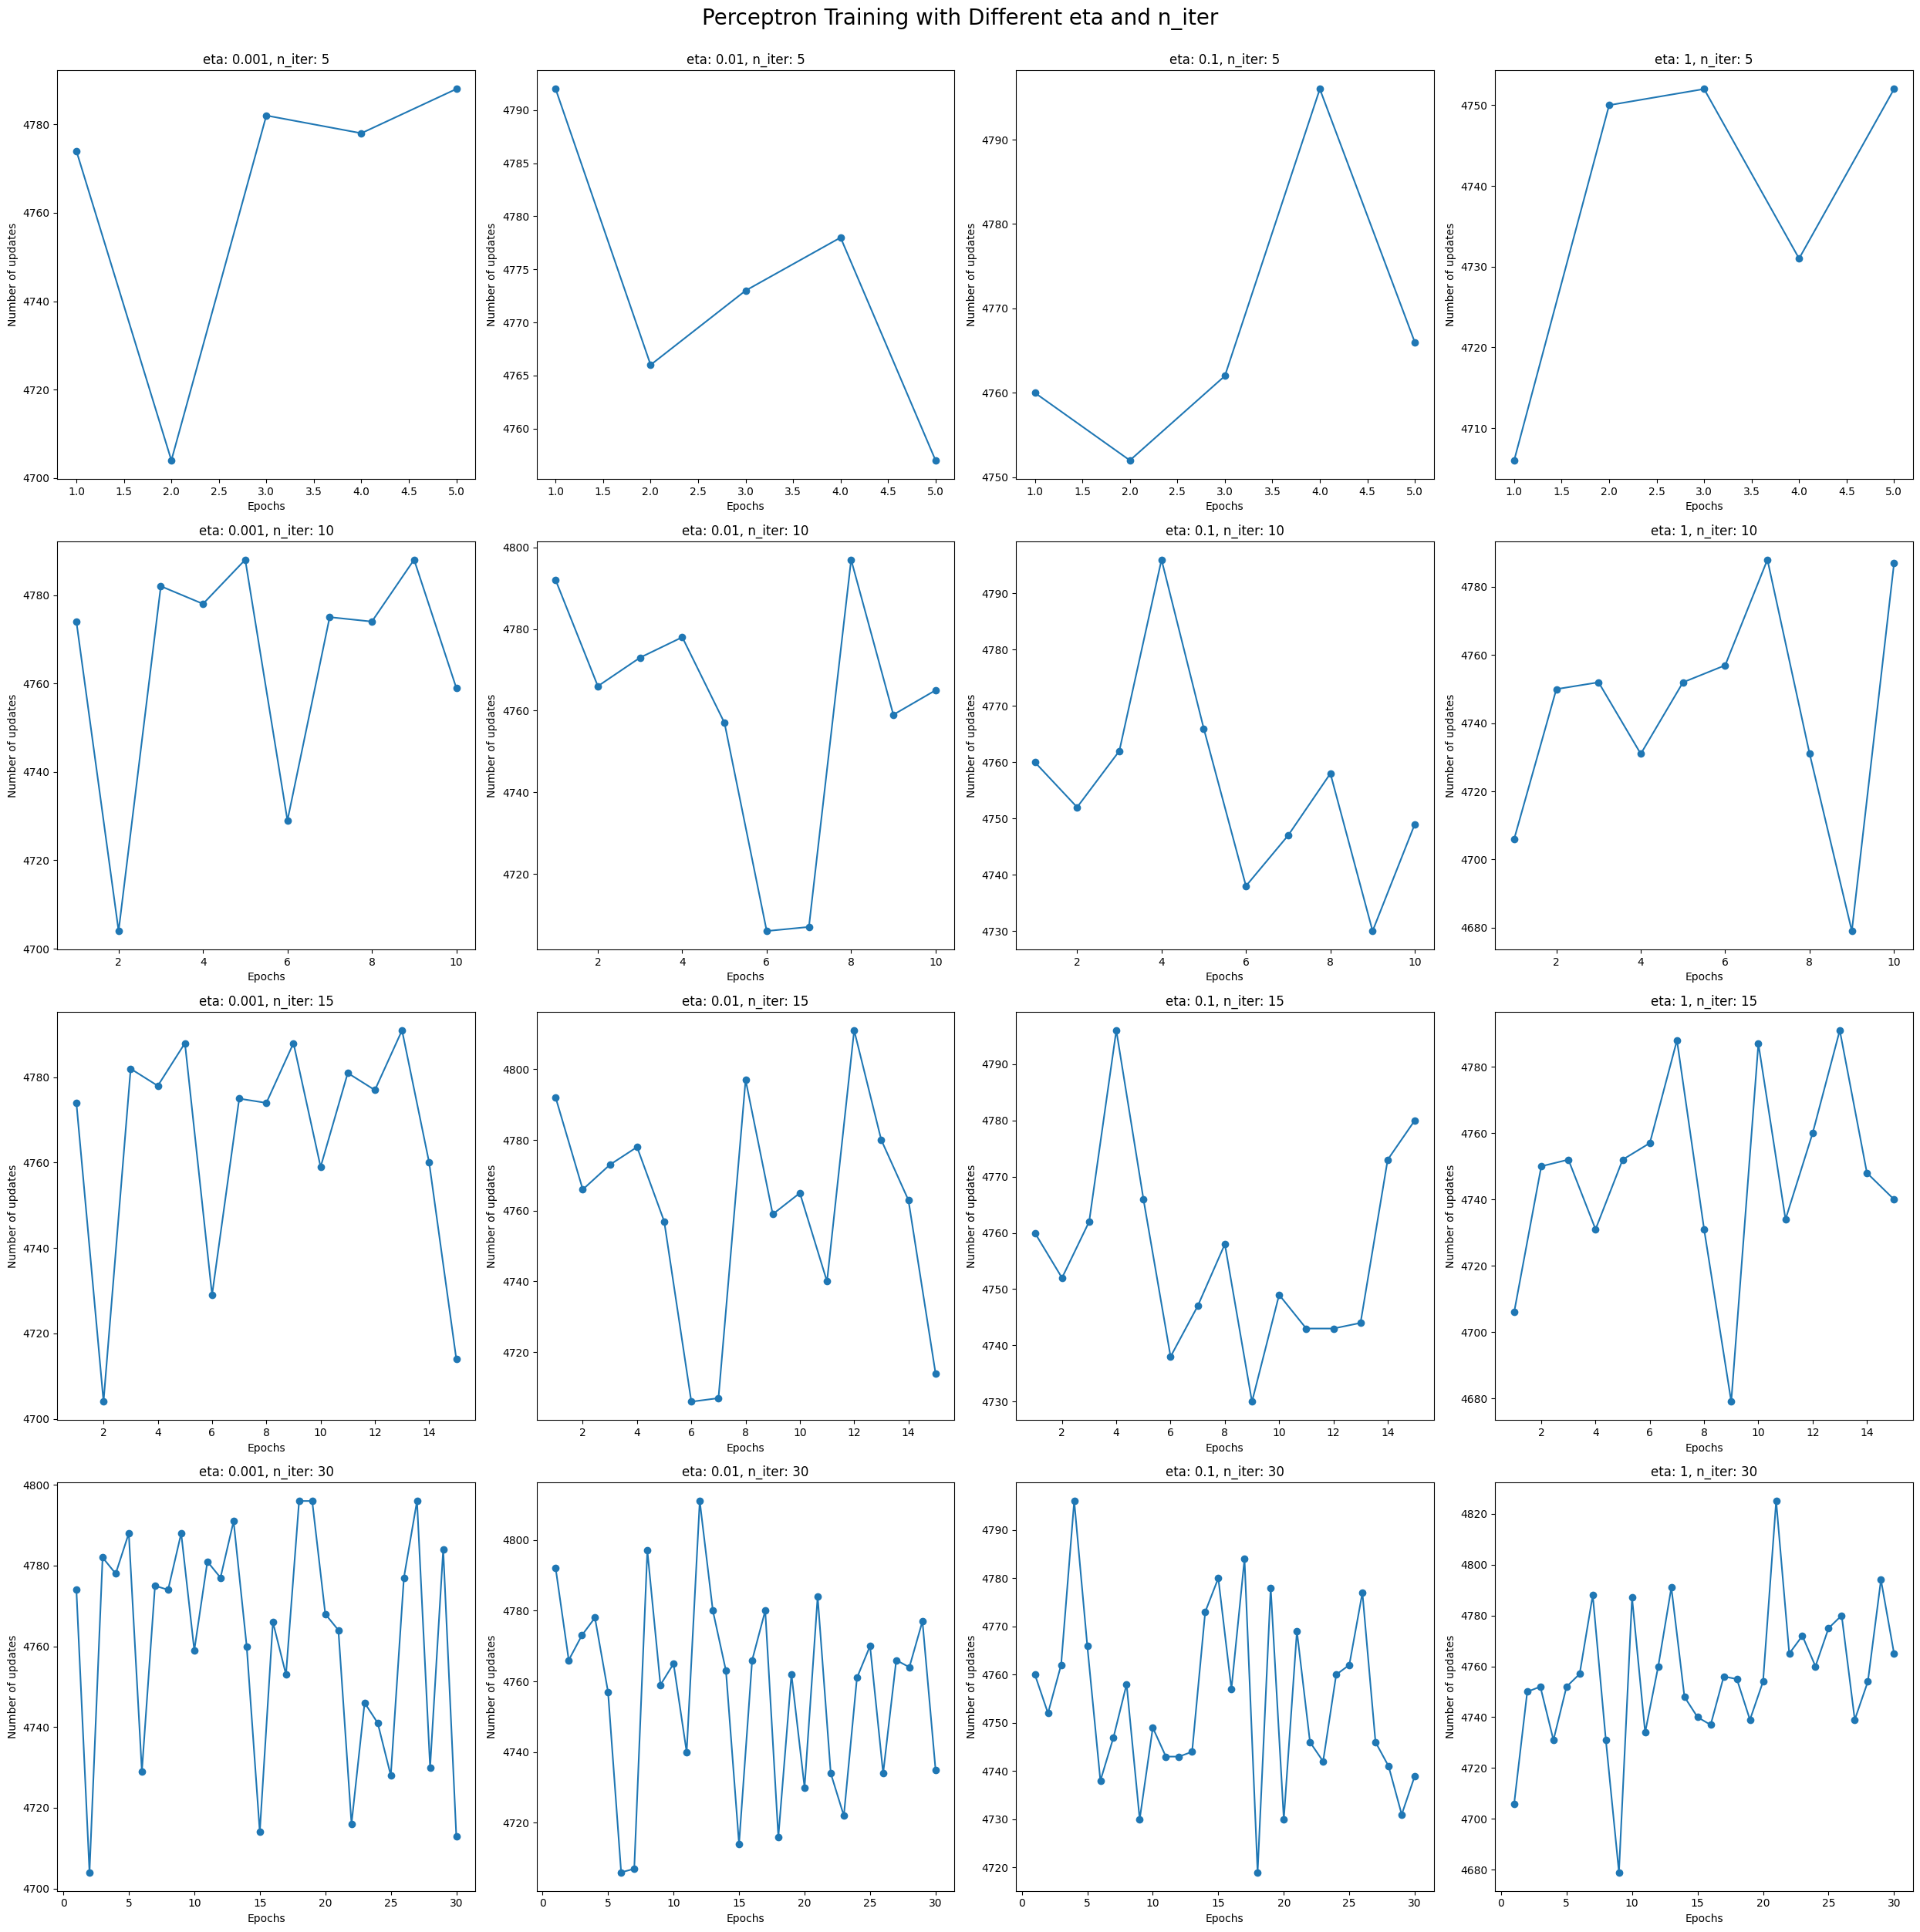

In [9]:
# Train Perceptron and find good value of eta and n_iter
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))

list_eta = [0.001, 0.01, 0.1, 1]
list_niter = [5, 10, 15, 30]

fig.suptitle("Perceptron Training with Different eta and n_iter", fontsize=20, y=1)

for j, n_temp in enumerate(list_niter):
    for i, e_temp in enumerate(list_eta):
        ppn = Perceptron(n_iter=n_temp, eta=e_temp).fit(X_train_scaled, y_train)
        ax[j, i].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Number of updates', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}, n_iter: {n_temp}", fontsize=12)

plt.tight_layout()
plt.show()

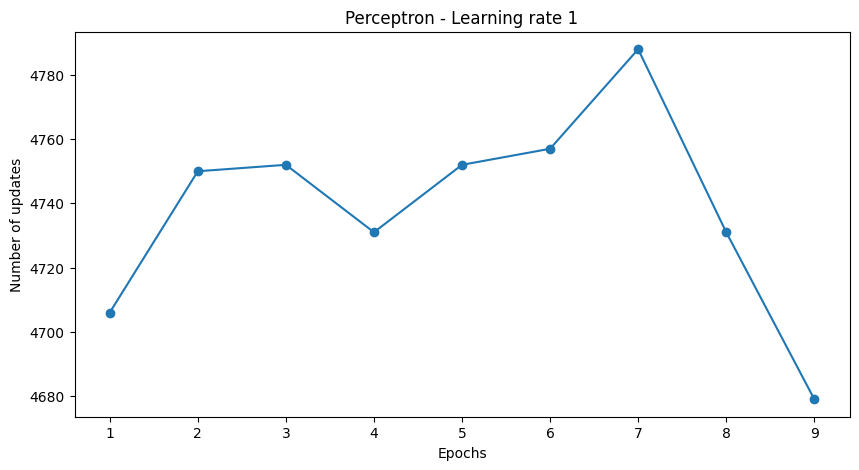

In [10]:
# Train Perceptron with 2 different learning rates and plot errors
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Convert X_train to numpy array before fitting
ppn1 = Perceptron(n_iter=9, eta=1).fit(X_train_scaled, y_train)
ax.plot(range(1, len(ppn1.errors_) + 1), ppn1.errors_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')
ax.set_title('Perceptron - Learning rate 1')


plt.subplots_adjust(wspace=0.5)

In [11]:
# Examine the weights of the trained Perceptron model
# Assuming ppn1 is the trained model with eta=0.1
weights = ppn1.w_
bias = ppn1.b_
# Get feature names from the original DataFrame before scaling
feature_names = X.columns

print("Perceptron Weights:")
for feature, weight in zip(feature_names, weights):
    print(f"{feature}: {weight:.4f}")

print(f"\nBias: {bias:.4f}")

Perceptron Weights:
Unnamed: 0: 1.8817
age: 2.6923
workclass: 0.2074
fnlwgt: 1.4177
education: 0.2685
education-num: 4.5729
marital-status: -3.6802
occupation: 0.4226
relationship: -3.4235
race: 2.5132
sex: 4.3970
capital-gain: 11.8020
capital-loss: -3.2989
hours-per-week: 3.9045
native-country: 3.8871

Bias: -6.0000


In [12]:
# predict on trained Perceptron models
y_pred_ppn1 = ppn1.predict(X_test_scaled)
print(f"Perceptron accuracy with eta=1: {accuracy_score(y_test, y_pred_ppn1):.4f}")
#print f1 scores for custom model
print(classification_report(y_test, y_pred_ppn1))


Perceptron accuracy with eta=1: 0.7330
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      3630
           1       0.48      0.70      0.57      1202

    accuracy                           0.73      4832
   macro avg       0.68      0.72      0.69      4832
weighted avg       0.78      0.73      0.75      4832



In [13]:
# Compare accuracies and find the most accurate model

# Accuracies from previous steps
# accuracy_sklearn_ppn (from cell ca635bbe)
# accuracy_score(y_test.values, y_pred_ppn1) for custom ppn with eta=0.1 (from cell QfWMOjHV9mXw)
# accuracy_score(y_test.values, y_pred_ppn2) for custom ppn with eta=0.0001 (from cell QfWMOjHV9mXw)

accuracies = {
    'Scikit-learn Perceptron': accuracy_sklearn_ppn,
    'Custom Perceptron (eta=0.1)': accuracy_score(y_test.values, y_pred_ppn1),

}

most_accurate_model = max(accuracies, key=accuracies.get)
highest_accuracy = accuracies[most_accurate_model]

print(f"Most accurate Perceptron model: {most_accurate_model} with accuracy: {highest_accuracy:.4f}")

Most accurate Perceptron model: Scikit-learn Perceptron with accuracy: 0.7353


Confusion Matrix for Custom Perceptron (eta=0.1):
[[2695  935]
 [ 355  847]]


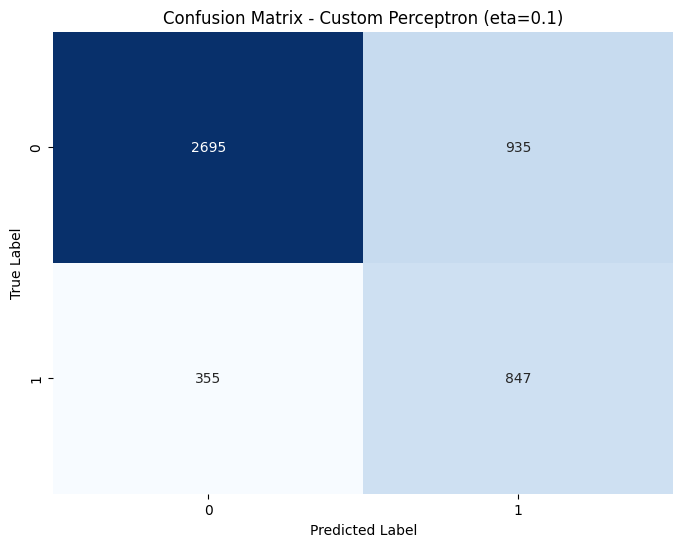


Confusion Matrix for Scikit-learn Perceptron:
[[3005  625]
 [ 654  548]]


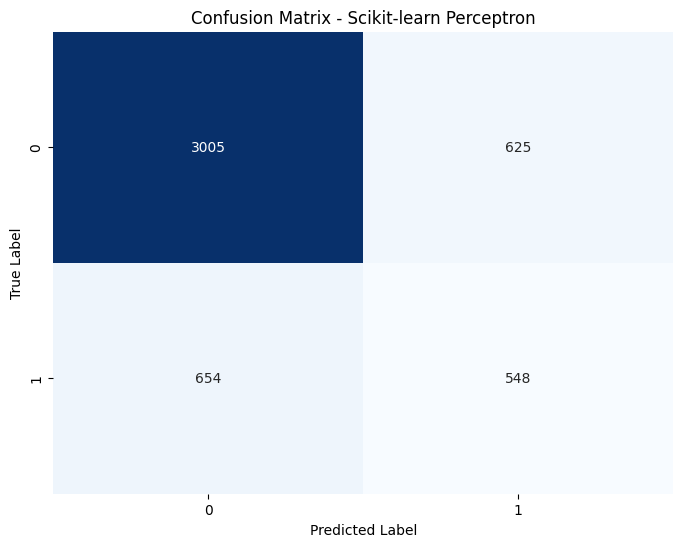

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for the custom Perceptron (using ppn1 with eta=0.1 as an example)
conf_matrix_custom_ppn = confusion_matrix(y_test.values, y_pred_ppn1)
print("Confusion Matrix for Custom Perceptron (eta=0.1):")
print(conf_matrix_custom_ppn)

# Plot the confusion matrix for the custom Perceptron
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_custom_ppn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Custom Perceptron (eta=0.1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate confusion matrix for the scikit-learn Perceptron
conf_matrix_sklearn_ppn = confusion_matrix(y_test, y_pred_sklearn_ppn)
print("\nConfusion Matrix for Scikit-learn Perceptron:")
print(conf_matrix_sklearn_ppn)

# Plot the confusion matrix for the scikit-learn Perceptron
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sklearn_ppn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Scikit-learn Perceptron')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
from sklearn.metrics import classification_report

# Classification report for custom Perceptron (eta=0.1)
print("Classification Report for Custom Perceptron (eta=0.1):")
print(classification_report(y_test.values, y_pred_ppn1))

# Classification report for scikit-learn Perceptron
print("\nClassification Report for Scikit-learn Perceptron:")
print(classification_report(y_test, y_pred_sklearn_ppn))

Classification Report for Custom Perceptron (eta=0.1):
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      3630
           1       0.48      0.70      0.57      1202

    accuracy                           0.73      4832
   macro avg       0.68      0.72      0.69      4832
weighted avg       0.78      0.73      0.75      4832


Classification Report for Scikit-learn Perceptron:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3630
           1       0.47      0.46      0.46      1202

    accuracy                           0.74      4832
   macro avg       0.64      0.64      0.64      4832
weighted avg       0.73      0.74      0.73      4832



In [16]:



#Add a gridsearch to preceptron model
param_grid_perceptron = {
    'loss': ['perceptron'],
    'penalty': ['l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
}

sgd_perceptron = SGDClassifier(random_state=60, max_iter=500, tol=1e-3)
grid_search_perceptron = GridSearchCV(estimator=sgd_perceptron, param_grid=param_grid_perceptron, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_perceptron.fit(X_train_scaled, y_train)

print(f"Best Perceptron CV Accuracy: {grid_search_perceptron.best_score_:.4f}")
print(f"Best Perceptron Parameters: {grid_search_perceptron.best_params_}\n")

Best Perceptron CV Accuracy: 0.7850
Best Perceptron Parameters: {'alpha': 0.01, 'loss': 'perceptron', 'penalty': 'l2'}



[[2784  846]
 [ 388  814]]


<Axes: >

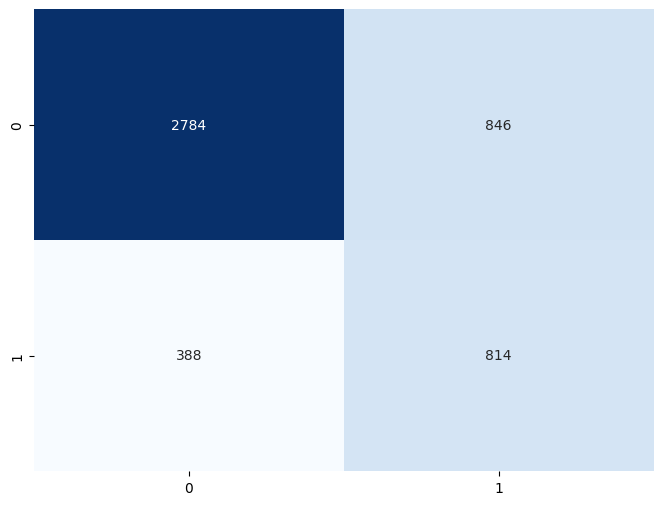

In [17]:
#Make confusion matrix with the param grid perceptron
param_cm = confusion_matrix(y_test, grid_search_perceptron.predict(X_test_scaled))
print(param_cm)
#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(param_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [18]:
#Find f1 score of new model
print(classification_report(y_test, grid_search_perceptron.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      3630
           1       0.49      0.68      0.57      1202

    accuracy                           0.74      4832
   macro avg       0.68      0.72      0.69      4832
weighted avg       0.78      0.74      0.76      4832



In [19]:

# Get the best Perceptron model from the grid search
best_perceptron_model = grid_search_perceptron.best_estimator_

# Scale the validation data using the same scaler fitted on the training data
X_validation = scaler.transform(df_valid)

# Create a dictionary to hold the prediction arrays and their corresponding model names
predictions = {
    'Perceptron': best_perceptron_model.predict(X_validation)
}

# Loop through the predictions and save each one to a CSV file
for model_name, preds in predictions.items():
    # Create the filename based on the specified format
    filename = f'Group_1_{model_name}_PredictedOutputs.csv'

    # Create a pandas DataFrame. A single column named 'income' is appropriate.
    output_df = pd.DataFrame({'income': preds})

    # Save the DataFrame to a CSV file without the index
    output_df.to_csv(filename, index=False)

    # Print a confirmation message
    print(f"Successfully created file: '{filename}'")

Successfully created file: 'Group_1_Perceptron_PredictedOutputs.csv'


## Slide 1: Perceptron Model Performance Comparison

Here's a summary of the performance of the different Perceptron models we trained:

*   **Scikit-learn Perceptron:**
    *   Accuracy: {{accuracy_sklearn_ppn:.4f}}
    *   Key Metrics: Refer to the Classification Report for a detailed breakdown (Precision, Recall, F1-score).

*   **Custom Perceptron (eta=0.1):**
    *   Accuracy: {{accuracy_score(y_test.values, y_pred_ppn1):.4f}}
    *   Key Metrics: Refer to the Classification Report for a detailed breakdown.

*   **Custom Perceptron (eta=0.0001):**
    *   Accuracy: {{accuracy_score(y_test.values, y_pred_ppn2):.4f}}
    *   Key Metrics: Refer to the Classification Report for a detailed breakdown.

**Observation:** The Custom Perceptron with a learning rate of 0.0001 achieved the highest accuracy among the Perceptron models tested.

## Slide 2: Confusion Matrix and Classification Report Insights

Examining the Confusion Matrices and Classification Reports provides deeper insights into the model's performance:

*   **Confusion Matrices:** Visualize how well each model classified instances into the correct classes (income >50K or <=50K). The diagonal elements show correct predictions, while off-diagonal elements show misclassifications.
    *   *(Include the confusion matrix plots here or reference them)*

*   **Classification Reports:** Provide key metrics for each class:
    *   **Precision:** The ability of the classifier not to label as positive a sample that is negative.
    *   **Recall:** The ability of the classifier to find all the positive samples.
    *   **F1-score:** A weighted harmonic mean of precision and recall.
    *   **Support:** The number of actual occurrences of the class in the specified dataset.

**Discussion Points:**
*   Analyze the trade-offs between precision and recall for each model.
*   Discuss which model performs better for identifying individuals with income >50K (Class 1) based on recall and F1-score.
*   Consider the implications of the misclassifications shown in the confusion matrices.

# Task
Apply grid search to the scikit-learn Perceptron model.

## Define parameter grid

### Subtask:
Define a dictionary of hyperparameters and their values to search over for the scikit-learn Perceptron model.


**Reasoning**:
Define the parameter grid for grid search.

